In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import minimize
import galkin
import galkin.processdata   # routines to process kinematic data
import galkin.readparsFile  # routines to read and check input parameters
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Constants
G = 4.302e-6#kpc/SM(km/s)^2
q_b = 0.6
r_b = 1.9#kpc
a_b = 1.#kpc
q_h = 0.8
alpha_b = 1.8
R_m = 4.#kpc
#parameters
rho_b_II = 0.3e9#sM/kpc^3
a_h_II = 1.9#kpc
rho_h_II = 0.266e9#SM/kpc^3
alpha_h_II = 1.63
beta_h_II = 2.17
R_d_II = 3.2#kpc
Sigma_d_SD_II = (536.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_II = (536.0e6)*0.25#SM/kpc^2
params = np.array([rho_b_II,rho_h_II,alpha_h_II,a_h_II,beta_h_II,R_d_II,Sigma_d_SD_II,Sigma_g_ISM_II])

In [4]:
def Vc2_b(R,rho_b,q_b=q_b,alpha_b=alpha_b,r_b=r_b,a_b=a_b):
    def I_b(x,R):
        e = np.sqrt(1. - q_b**2.)
        n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
        d = np.sqrt(1.-x**2.*e**2.)
        t = R**2.*(R/a_b)**(-alpha_b)
        return (t*n)/d
    Integral_b = []
    for i in range (0,len(R)):
        result = integrate.quad(I_b,0,1,args=(R[i]))[0]
        Integral_b.append(result)
    return 4.*np.pi*G*q_b*rho_b*np.array(Integral_b)

In [5]:
 def Vc2_DM(R,a_h,rho_h,alpha_h,beta_h,q_h=q_h):
    def I_h(x,R):
        e = np.sqrt(1.- q_h**2.)
        n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
        d = np.sqrt(1-x**2.*e**2)
        t = R**2.*(R/a_h)**(-alpha_h)
        result = (t*n)/d
        return result
    Integral_DM = []
    for i in range (0,len(R)):
        result = integrate.quad(I_h,0,1,args=(R[i]))[0]
        Integral_DM.append(result)
    return 4.*np.pi*G*q_h*rho_h*np.array(Integral_DM)

In [6]:
def Vc2_SD(R,R_d,Sigma_d_SD):
    result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
    return 2.*np.pi*G*Sigma_d_SD*R_d*result

In [7]:
def Vc2_ISM(R,R_d,Sigma_g_ISM,R_m=R_m):
    def M_g_ISM(u,R):
        return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
    Integral_M_g = []
    for i in range (0,len(R)):
        result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
        Integral_M_g.append(result)
    return 2.*np.pi*Sigma_g_ISM*G*np.array(Integral_M_g)

In [8]:
def Vc_tot_R_d(R,parameter,parameters):
    R_d = parameter
    Sigma_d_SD,rho_b,a_h,rho_h,alpha_h,beta_h,Sigma_g_ISM = parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD(R,R_d,Sigma_d_SD) + Vc2_ISM(R,R_d,Sigma_g_ISM)
    return np.sqrt(suma)

In [9]:
R = np.linspace(0.,15.,100)

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separa

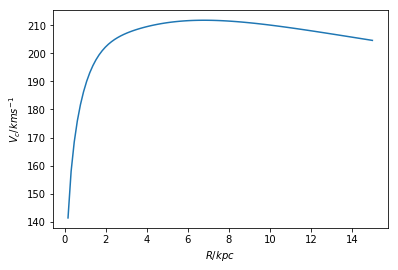

In [10]:
params_wo_R_d = np.array([Sigma_d_SD_II,rho_b_II,a_h_II,rho_h_II,alpha_h_II,beta_h_II,Sigma_g_ISM_II])
plt.plot(R,Vc_tot_R_d(R,R_d_II,params_wo_R_d))
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.show()

In [11]:
#10.3, 15.3, 7.7from the paper
#11.10,12.24,7.25 orginally
# Galactic parameters
R0=8.0# Galactocentric distance (kpc)
V0=230.# local circular velocity (km/s)
UsunINUSE=10.3#11.10# solar motion in the U-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
VsunINUSE=15.3#12.24# solar motion in the V-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
WsunINUSE=07.7#07.25# solar motion in the W-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
SYSTDISP=0.# systematic dispersion due to spiral arm streaming (km/s)

In [12]:
# Flags
flagPROPERMOTIONS=0	 			# proper motions not supported in current version - please keep at 0
flagHITERMINAL=0				# whether to use HI terminal velocities
flagFich89tab2=0				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 2)
flagMalhotra95=0				# whether to use Malhotra '95, ApJ 448, 138 (1995)
flagMcClureGriffithsDickey07=0			# whether to use McClure-Griffiths & Dickey '07, ApJ 671, 427 (2007)
flagHITHICKNESS=0				# whether to use the HI thickness method
flagHonmaSofue97=0				# whether to use Honma & Sofue '97, PASJ 49, 453 (1997)
flagCOTERMINAL=0				# whether to use CO terminal velocities
flagBurtonGordon78=0				# whether to use Burton & Gordon '78, A&A 63, 7 (1978)
flagClemens85=0					# whether to use Clemens '85, ApJ 295, 422 (1985)
flagKnapp85=0					# whether to use Knapp+ '85, AJ 90, 2 (1985)
flagLuna06=0					# whether to use Luna+ '06, ApJ 641, 938 (2006)
flagHIIREGIONS=1				# whether to use HII regions
flagBlitz79=0					# whether to use Blitz '79, ApJL 231, L115 (1979)
flagFich89tab1=0				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 1)	
flagTurbideMoffat93=0				# whether to use Turbide & Moffat '93, AJ 105, 5 (1993)
flagBrandBlitz93=0				# whether to use Brand & Blitz '93, A&A 275, 67 (1993)
flagHou09tabA1=1				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A1)
flagGMC=0					# whether to use giant molecular clouds
flagHou09tabA2=0				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A2)
##
flagOPENCLUSTERS=0				# whether to use open clusters
flagFrinchaboyMajewski08=0			# whether to use Frinchaboy & Majewski '08, AJ 136, 118 (2008)
flagPLANETARYNEBULAE=0				# whether to use planetary nebulae
flagDurand98=0					# whether to use Durand+ '98, A&AS 132, 13 (1998)
flagCEPHEIDS=1					# whether to use classical cepheids
flagPont94=1					# whether to use Pont+ '94, A&A 285, 415 (1994)
flagPont97=0					# whether to use Pont+ '97, A&A 318, 416 (1997)
flagCSTARS=0					# whether to use carbon stars
flagDemersBattinelli07=0			# whether to use Demers & Battinelli '07, A&A 473, 143 (2007)
flagBattinelli12=0				# whether to use Battinelli+ '12, Ap 56, 68 (2013)
###
flagMASERS=0					# whether to use masers
flagReid14=0					# whether to use Reid+ '14, ApJ 783, 130 (2014)
flagHonma12=0					# whether to use Honma+ '12, PASJ 64, 136 (2012)
flagStepanishchevBobylev11=0			# whether to use Stepanishchev & Bobylev '11, AstL 37, 4 (2011)
flagXu13=0					# whether to use Xu+ '13, ApJ 769, 15 (2013)
flagBobylevBajkova13=0				# whether to use Bobylev & Bajkova '13, AstL 39, 809 (2013)
##
flagastropy=0				 	# whether to use astropy for equatorial-to-galactic conversions

In [13]:
inputpars=(R0,V0,UsunINUSE,VsunINUSE,WsunINUSE,SYSTDISP, flagPROPERMOTIONS,flagHITERMINAL,flagFich89tab2,flagMalhotra95,flagMcClureGriffithsDickey07, flagHITHICKNESS,flagHonmaSofue97,flagCOTERMINAL,flagBurtonGordon78,flagClemens85,flagKnapp85,flagLuna06, flagHIIREGIONS,flagBlitz79,flagFich89tab1,flagTurbideMoffat93,flagBrandBlitz93,flagHou09tabA1, flagGMC,flagHou09tabA2,flagOPENCLUSTERS,flagFrinchaboyMajewski08,flagPLANETARYNEBULAE,flagDurand98,flagCEPHEIDS,flagPont94,flagPont97, flagCSTARS,flagDemersBattinelli07,flagBattinelli12, flagMASERS,flagReid14,flagHonma12,flagStepanishchevBobylev11,flagXu13,flagBobylevBajkova13,flagastropy)

In [14]:
galkin.readparsFile.CheckAndPrintParameters(inputpars)

checking validity of input parameters...
printing input parameters...
 R0=  8.0  kpc
 V0=  230.0  km/s
 (Usun,Vsun,Wsun) = ( 10.3 , 15.3 , 7.7 ) km/s
 systematic dispersion =  0.0  km/s
 use HI terminal velocities?            0
 use HI thickness method?               0
 use CO terminal velocities?            0
 use HII regions?                       1
  use Blitz 79?                           0
  use Fich+ 89 (Table 1)?                 0
  use Turbide & Moffat 93?                0
  use Brand & Blitz 93?                   0
  use Hou+ 09 (Table A1)?                 1
 use giant molecular clouds?            0
 use open clusters?                     0
 use planetary nebulae?                 0
 use cepheids?                          1
  use Pont+ 94?                           1
  use Pont+ 97?                           0
 use C stars?                           0
 use masers?                            0
 use astropy?                           0


In [15]:
vecout=galkin.processdata.ProcessData(inputpars)
totallistvc=vecout[0]

processing HII regions...
 processing Hou+ 09 (Table A1)...
  selected  316  out of the total sample of  815  HII regions
processing classical cepheids...
 processing Pont+ 94...
  selected  245  out of the total sample of  278  cepheids


In [16]:
vecRp    = np.array([row[0] for row in totallistvc])# galactocentric distance [kpc]
vecerrRp = np.array([row[1] for row in totallistvc])# error in galactocentric distance [kpc]
vecvRp   = np.array([row[2] for row in totallistvc])# rotation velocity [km/s]
vecerrvRp= np.array([row[3] for row in totallistvc])# error in rotation velocity [km/s]

In [17]:
print min(vecvRp),max(vecvRp),min(vecRp),max(vecRp)

137.34270287873696 394.49691551827425 3.4805916598031352 17.55446098248422


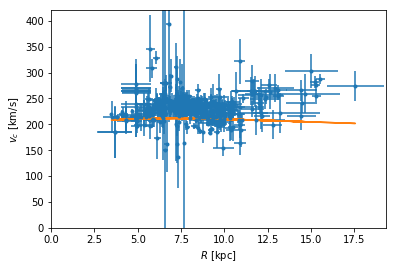

In [19]:
fig, ax1 = plt.subplots()
ax1.errorbar(vecRp, vecvRp, xerr=vecerrRp, yerr=vecerrvRp, fmt='.')
ax1.axis([0., max(vecRp)+0.1*(max(vecRp)-0.), min(0.,min(vecvRp)-0.1*(max(vecvRp)-min(vecvRp))) , max(vecvRp)+0.1*(max(vecvRp)-min(vecvRp))])
ax1.set_xlabel('$R$ [kpc]')
ax1.set_ylabel('$v_c$ [km/s]')
plt.plot(vecRp,Vc_tot_R_d(vecRp,R_d_II,params_wo_R_d))
plt.show()

# $R_{d}$

In [23]:
def Xi2_R_d(parameter):
    R_d = parameter
    model = Vc_tot_R_d(vecRp,parameter,params_wo_R_d)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [24]:
print Xi2_R_d(R_d_II),R_d_II

8641.443519411754 3.2


In [25]:
#print Xi2_R_d(2.42)#Minimum by hand

In [26]:
#print Xi2_R_d(2.41)#Minimum by hand

In [28]:
x0_R_d = np.array(1.0)

In [31]:
LS = minimize(Xi2_R_d,x0_R_d,method='L-BFGS-B',bounds=((1.0,9.),))#,bounds=((np.log(1.0e8),np.log(9.0e8))))#,'eps':0.1)

In [32]:
print LS

      fun: 2187.701568968937
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([4.54747351e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 14
      nit: 4
   status: 0
  success: True
        x: array([5.80088817])


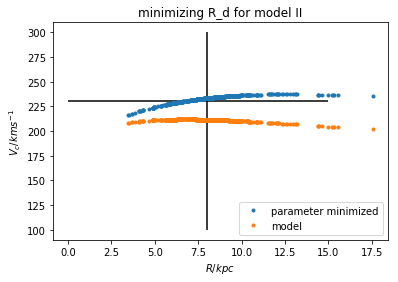

In [36]:
#fig, ax1 = plt.subplots()
#ax1.errorbar(vecRp, vecvRp, xerr=vecerrRp, yerr=vecerrvRp, fmt='.')
#ax1.axis([0., max(vecRp)+0.1*(max(vecRp)-0.), min(0.,min(vecvRp)-0.1*(max(vecvRp)-min(vecvRp))) , max(vecvRp)+0.1*(max(vecvRp)-min(vecvRp))])
#ax1.set_xlabel('$R$ [kpc]')
#ax1.set_ylabel('$v_c$ [km/s]')
plt.plot(vecRp,Vc_tot_R_d(vecRp,np.asscalar(LS.x),params_wo_R_d),'.',label='parameter minimized')
plt.plot(vecRp,Vc_tot_R_d(vecRp,R_d_II,params_wo_R_d),'.',label='model')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.title("minimizing R_d for model II")
plt.hlines(230,0,15)
plt.vlines(8,100,300)
plt.show()

# $\Sigma_{d}$_SD (escala logaritmica)

In [44]:
def Vc_tot_Sigma_SD(R,parameter,parameters):
    Sigma_d_SD = parameter
    R_d,rho_b,a_h,rho_h,alpha_h,beta_h,Sigma_g_ISM = parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD(R,R_d,Sigma_d_SD) + Vc2_ISM(R,R_d,Sigma_g_ISM)
    return np.sqrt(suma)

In [45]:
params_wo_Sigma_SD = np.array([R_d_II,rho_b_II,a_h_II,rho_h_II,alpha_h_II,beta_h_II,Sigma_g_ISM_II])

In [50]:
def Xi2_Sigma_SD(parameters):
    Sigma_d_SD = np.exp(parameters)
    model = Vc_tot_Sigma_SD(vecRp,Sigma_d_SD,params_wo_Sigma_SD)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [51]:
print Xi2_Sigma_SD(np.log(Sigma_d_SD_II)),Sigma_d_SD_II

8641.443519411736 402000000.0


In [52]:
x0_Sigma_SD=np.array(np.log(0.15e9))
LS_Sigma_SD = minimize(Xi2_Sigma_SD,x0_Sigma_SD,method='L-BFGS-B',bounds=((np.log(0.15e9),np.log(3.0e9)),))
print LS_Sigma_SD

      fun: 2011.339319061474
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([6.82121026e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 18
      nit: 3
   status: 0
  success: True
        x: array([20.46946531])


In [53]:
print np.exp(LS_Sigma_SD.x)

[7.75846549e+08]


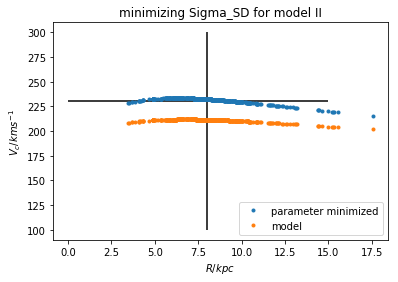

In [55]:
plt.plot(vecRp,Vc_tot_Sigma_SD(vecRp,np.asscalar(np.exp(LS_Sigma_SD.x)),params_wo_Sigma_SD),'.',label='parameter minimized')
plt.plot(vecRp,Vc_tot_Sigma_SD(vecRp,Sigma_d_SD_II,params_wo_Sigma_SD),'.',label='model')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.title("minimizing Sigma_SD for model II")
plt.hlines(230,0,15)
plt.vlines(8,100,300)
plt.show()

# $a_{h}$

In [56]:
def Vc_tot_a_h(R,parameter,parameters):
    a_h = parameter
    R_d,rho_b,Sigma_d_SD,rho_h,alpha_h,beta_h,Sigma_g_ISM = parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD(R,R_d,Sigma_d_SD) + Vc2_ISM(R,R_d,Sigma_g_ISM)
    return np.sqrt(suma)

In [57]:
pars_wo_a_h = np.array([R_d_II,rho_b_II,Sigma_d_SD_II,rho_h_II,alpha_h_II,beta_h_II,Sigma_g_ISM_II])

In [58]:
def Xi2_a_h(parameters):
    a_h = parameters
    model = Vc_tot_a_h(vecRp,a_h,pars_wo_a_h)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [59]:
print Xi2_a_h(a_h_II)

8641.443519411754


In [60]:
x0_a_h = np.array(1.0)
LS_a_h = minimize(Xi2_a_h,x0_a_h,method='L-BFGS-B',bounds=((1.0,9.),))
print LS_a_h

      fun: 2026.659900888942
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.54747351e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 16
      nit: 6
   status: 0
  success: True
        x: array([2.17908909])


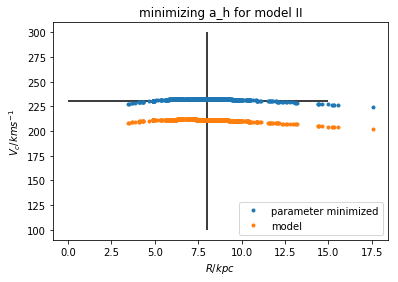

In [62]:
plt.plot(vecRp,Vc_tot_a_h(vecRp,np.asscalar(LS_a_h.x),pars_wo_a_h),'.',label='parameter minimized')
plt.plot(vecRp,Vc_tot_a_h(vecRp,a_h_II,pars_wo_a_h),'.',label='model')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.title("minimizing a_h for model II")
plt.hlines(230,0,15)
plt.vlines(8,100,300)
plt.show()

# $\rho_{b}$(Escala logaritmica)

In [63]:
def Vc_tot_rho_b(R,parameter,parameters):
    rho_b = parameter
    R_d,a_h,Sigma_d_SD,rho_h,alpha_h,beta_h,Sigma_g_ISM = parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD(R,R_d,Sigma_d_SD) + Vc2_ISM(R,R_d,Sigma_g_ISM)
    return np.sqrt(suma)

In [64]:
params_wo_rho_b = np.array([R_d_II,a_h_II,Sigma_d_SD_II,rho_h_II,alpha_h_II,beta_h_II,Sigma_g_ISM_II])

In [65]:
def Xi2_rho_b(parameters):
    rho_b = np.exp(parameters)
    model = Vc_tot_rho_b(vecRp,rho_b,params_wo_rho_b)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [66]:
print Xi2_rho_b(np.log(rho_b_II))

8641.443519411756


In [67]:
x0_rho_b = np.array(np.log(1.0e8))
LS_rho_b = minimize(Xi2_rho_b,x0_rho_b,method='L-BFGS-B',bounds=((np.log(1.0e8),np.log(30.0e8)),))
print LS_rho_b

      fun: 2509.1571427500985
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.54747351e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 20
      nit: 4
   status: 0
  success: True
        x: array([21.11732676])


In [69]:
print np.exp(LS_rho_b.x)

[1.4829909e+09]


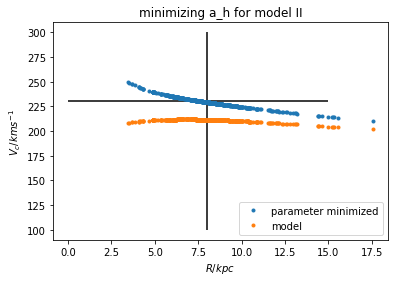

In [70]:
plt.plot(vecRp,Vc_tot_rho_b(vecRp,np.asscalar(np.exp(LS_rho_b.x)),params_wo_rho_b),'.',label='parameter minimized')
plt.plot(vecRp,Vc_tot_rho_b(vecRp,rho_b_II,params_wo_rho_b),'.',label='model')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.title("minimizing rho_b for model II")
plt.hlines(230,0,15)
plt.vlines(8,100,300)
plt.show()

# $\rho_{h}$

In [71]:
def Vc_tot_rho_h(R,parameter,parameters):
    rho_h = parameter
    R_d,a_h,Sigma_d_SD,rho_b,alpha_h,beta_h,Sigma_g_ISM = parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD(R,R_d,Sigma_d_SD) + Vc2_ISM(R,R_d,Sigma_g_ISM)
    return np.sqrt(suma)

In [72]:
params_wo_rho_h = np.array([R_d_II,a_h_II,Sigma_d_SD_II,rho_b_II,alpha_h_II,beta_h_II,Sigma_g_ISM_II])

In [73]:
def Xi2_rho_h(parameters):
    rho_h = np.exp(parameters)
    model = Vc_tot_rho_h(vecRp,rho_h,params_wo_rho_h)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [75]:
print Xi2_rho_h(np.log(rho_h_II))

8641.44351941169


In [76]:
x0_rho_h = np.array(np.log(1.0e8))
LS_rho_h = minimize(Xi2_rho_h,x0_rho_h,method='L-BFGS-B',bounds=((np.log(1.0e8),np.log(20.0e8)),))
print LS_rho_h

      fun: 2029.1524134550941
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.27373675e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 20
      nit: 6
   status: 0
  success: True
        x: array([19.66726189])


In [77]:
print np.exp(LS_rho_h.x)

[3.47843037e+08]


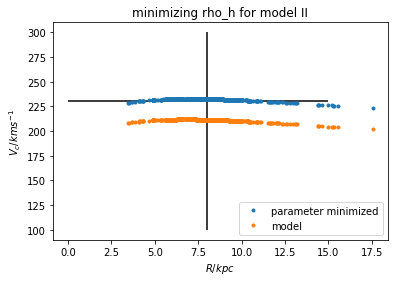

In [78]:
plt.plot(vecRp,Vc_tot_rho_h(vecRp,np.asscalar(np.exp(LS_rho_h.x)),params_wo_rho_h),'.',label='parameter minimized')
plt.plot(vecRp,Vc_tot_rho_h(vecRp,rho_h_II,params_wo_rho_h),'.',label='model')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.title("minimizing rho_h for model II")
plt.hlines(230,0,15)
plt.vlines(8,100,300)
plt.show()

# $\alpha_{h}$

In [79]:
def Vc_tot_alpha_h(R,parameter,parameters):
    alpha_h = parameter
    R_d,a_h,Sigma_d_SD,rho_b,rho_h,beta_h,Sigma_g_ISM = parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD(R,R_d,Sigma_d_SD) + Vc2_ISM(R,R_d,Sigma_g_ISM)
    return np.sqrt(suma)

In [80]:
params_wo_alpha_h = np.array([R_d_II,a_h_II,Sigma_d_SD_II,rho_b_II,rho_h_II,beta_h_II,Sigma_g_ISM_II])

In [81]:
def Xi2_alpha_h(parameters):
    alpha_h = parameters
    model = Vc_tot_alpha_h(vecRp,alpha_h,params_wo_alpha_h)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [82]:
print Xi2_alpha_h(alpha_h_II)

8641.443519411754


In [83]:
x0_alpha_h = np.array(-3.)
LS_alpha_h = minimize(Xi2_alpha_h,x0_alpha_h,method='L-BFGS-B',bounds=((-3.,3.),))
print LS_alpha_h

/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


      fun: 2211.6882031024143
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 26
      nit: 5
   status: 0
  success: True
        x: array([2.06091366])


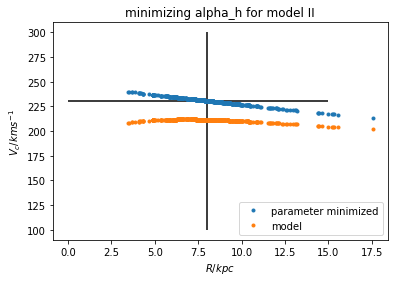

In [84]:
plt.plot(vecRp,Vc_tot_alpha_h(vecRp,np.asscalar(LS_alpha_h.x),params_wo_alpha_h),'.',label='parameter minimized')
plt.plot(vecRp,Vc_tot_alpha_h(vecRp,alpha_h_II,params_wo_alpha_h),'.',label='model')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.title("minimizing alpha_h for model II")
plt.hlines(230,0,15)
plt.vlines(8,100,300)
plt.show()

# $\beta_{h}$

In [85]:
def Vc_tot_beta_h(R,parameter,parameters):
    beta_h = parameter
    R_d,a_h,Sigma_d_SD,rho_b,rho_h,alpha_h,Sigma_g_ISM = parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD(R,R_d,Sigma_d_SD) + Vc2_ISM(R,R_d,Sigma_g_ISM)
    return np.sqrt(suma)

In [86]:
params_wo_beta_h = np.array([R_d_II,a_h_II,Sigma_d_SD_II,rho_b_II,rho_h_II,alpha_h_II,Sigma_g_ISM_II])

In [87]:
def Xi2_beta_h(parameters):
    beta_h = parameters
    model = Vc_tot_beta_h(vecRp,beta_h, params_wo_beta_h)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [88]:
print Xi2_beta_h(beta_h_II)

8641.443519411754


In [89]:
x0_beta_h = np.array(1.)
LS_beta_h = minimize(Xi2_beta_h,x0_beta_h,method='L-BFGS-B',bounds=((1.,3.),))
print LS_beta_h

      fun: 2094.5072421145637
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.0001819])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 22
      nit: 7
   status: 0
  success: True
        x: array([1.92417635])


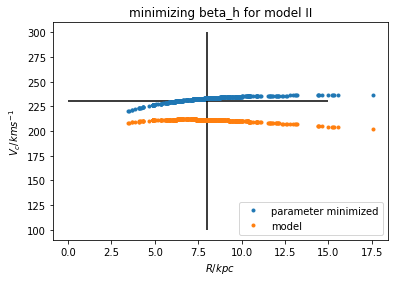

In [91]:
plt.plot(vecRp,Vc_tot_beta_h(vecRp,np.asscalar(LS_beta_h.x),params_wo_beta_h),'.',label='parameter minimized')
plt.plot(vecRp,Vc_tot_beta_h(vecRp,beta_h_II,params_wo_beta_h),'.',label='model')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.title("minimizing beta_h for model II")
plt.hlines(230,0,15)
plt.vlines(8,100,300)
plt.show()

# $\Sigma_{g}$ISM (Escala logaritmica)

In [92]:
def Vc_tot_Sigma_ISM(R,parameter,parameters):
    Sigma_g_ISM = parameter
    R_d,a_h,Sigma_d_SD,rho_b,alpha_h,beta_h,rho_h = parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD(R,R_d,Sigma_d_SD) + Vc2_ISM(R,R_d,Sigma_g_ISM)
    return np.sqrt(suma)

In [93]:
params_wo_Sigma_ISM = np.array([R_d_II,a_h_II,Sigma_d_SD_II,rho_b_II,alpha_h_II,beta_h_II,rho_h_II])

In [97]:
def Xi2_Sigma_g_ISM(parameters):
    Sigma_g_ISM = np.exp(parameters)
    model =  Vc_tot_Sigma_ISM(vecRp,Sigma_g_ISM,params_wo_Sigma_ISM)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [98]:
print Xi2_Sigma_g_ISM(np.log(Sigma_g_ISM_II))

8641.443519411752


In [102]:
x0_Sigma_g_ISM = np.array(np.log(0.15e9))
LS_Sigma_g_ISM = minimize(Xi2_Sigma_g_ISM,x0_Sigma_g_ISM,method='L-BFGS-B',bounds=((np.log(0.15e9),np.log(3.0e9)),))
print LS_Sigma_g_ISM

      fun: 2207.9741656840924
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-9.09494702e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 20
      nit: 5
   status: 0
  success: True
        x: array([20.27489707])


In [104]:
print np.exp(LS_Sigma_g_ISM.x)

[6.3866912e+08]


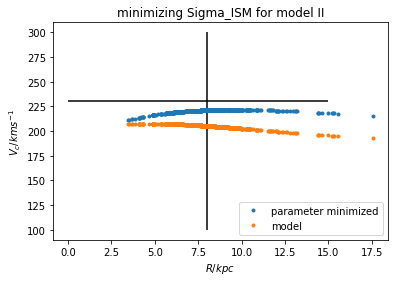

In [101]:
plt.plot(vecRp,Vc_tot_Sigma_ISM(vecRp,np.asscalar(np.exp(LS_Sigma_g_ISM.x)),params_wo_Sigma_ISM),'.',label='parameter minimized')
plt.plot(vecRp,Vc_tot_Sigma_ISM(vecRp,beta_h_II,params_wo_Sigma_ISM),'.',label='model')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.title("minimizing Sigma_ISM for model II")
plt.hlines(230,0,15)
plt.vlines(8,100,300)
plt.show()